In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random


%matplotlib inline

In [6]:
df = pd.DataFrame()

df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
x    25 non-null int64
y    25 non-null int64
dtypes: int64(2)
memory usage: 480.0 bytes
None


,x,y
0,96,1
1,17,2
2,8,73
3,22,85
4,6,87


## Scatter Plot

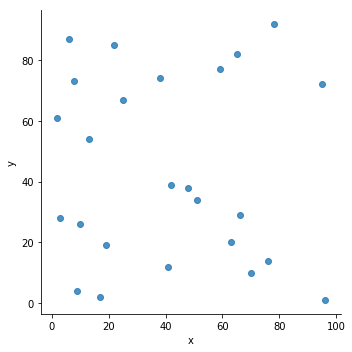

In [7]:
sns.lmplot('x', 'y', data=df, fit_reg=False)


In [14]:
np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

## Plotting Distributions

/home/jasper/working/github/pydata-visualisation/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


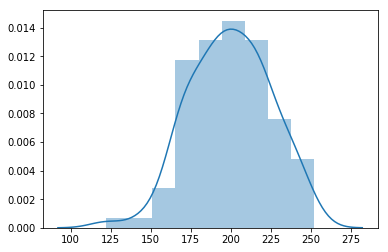

In [13]:
sns.distplot(x)

## Nicer plots in seaborn:

## Scatter plots

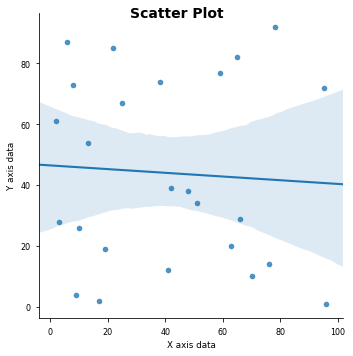

In [32]:
with sns.plotting_context(context='paper'):
    pl = sns.lmplot(data=df, x='x', y='y')

    pl.fig.suptitle('Scatter Plot', fontsize=14, fontweight='bold')
    pl.ax.set(xlabel='X axis data', ylabel='Y axis data');

`ax` level functions and `fig` level functions.